Average MSE of Models:  637475.3055925798
Average R^2 of Models:  -1.170265578679253


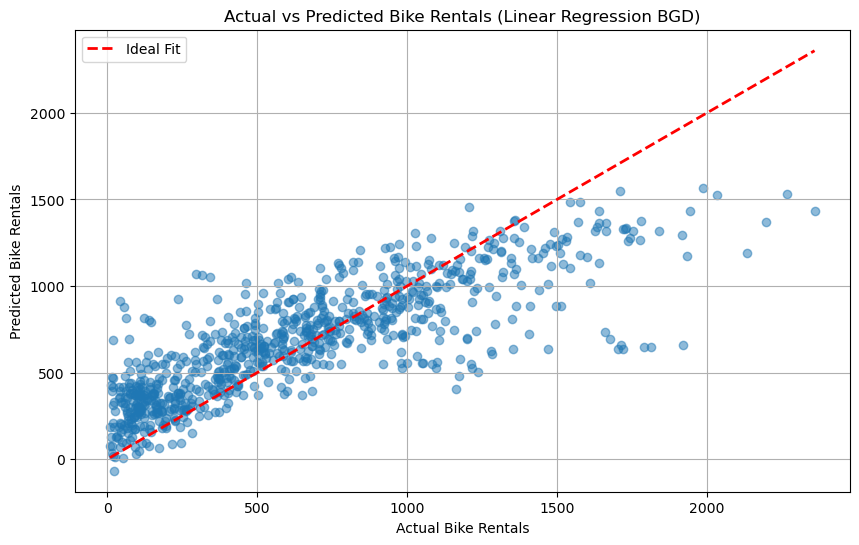

Best MSE of Model:  78416.91522030366
Best R^2 of Model:  0.6511185583874868


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

def linear_regression(X, y, random_state=None):
    seed = 185
    degree = 2 # 1, 2, 3
    batch_size = 8 # 8, 16, 32
    regularization_term = 0.0001 # 0.001, 0.01
    # Define type of penalty
    penalty_type = "l2"
    folds = 10
    # Define number of folds for cross-validation
    kf = KFold(folds)
    # Set Randomness for Reproducibility
    np.random.seed(seed)
    # Perform Polynomial Transformation
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)
    
    model_results = []
    r_squares = []
    mses = []
    # Split into k_folds
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        # Perform BGD Fit polynomial regression model
        model = SGDRegressor(learning_rate="constant", eta0=0.00001, 
                             random_state=seed, alpha=regularization_term, penalty=penalty_type)
        epochs = 30
        m = X_train.shape[0]
        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            # Iterate over the batches in each epoch
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X_train[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y_train[indices]
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X_train
                    y_batch = y_train
                model.partial_fit(X_batch, y_batch)

        # Obtain the predictions on the test data
        y_pred = model.predict(X_test)
        
        # store mse score of the model applied on the test data
        mse = mean_squared_error(y_test, y_pred)
        r_square = r2_score(y_test, y_pred)
        
        r_squares.append(r_square)
        mses.append(mse)
        model_results.append([model, mse, r_square, y_pred, y_test])
    
    # print the total_error of the best model
    best_model_index = np.argmax(r_squares)
    
    print("Average MSE of Models: ",np.mean(mses))
    print("Average R^2 of Models: ",np.mean(r_squares))
    
    return model_results[best_model_index]


# Loud the housing dataset
all_data = pd.DataFrame(pd.read_csv('./ProcessedData.csv'))
X = all_data.drop(columns=['Rented Bike Count', 'Seasons_Autumn', 
                           'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Solar Radiation', 'Snowfall'])
# Set the target variable
y = all_data['Rented Bike Count'].ravel()
# Perform Batch Gradient Descent
model, mse, r_square, y_pred, y_test = linear_regression(X, y)
# Plot y_pred vs y_test
# Plot y_pred vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals (Linear Regression BGD)')
plt.legend()
plt.grid(True)
plt.show()
print("Best MSE of Model: ", mse)
print("Best R^2 of Model: ", r_square)

133505.32776650522
-0.5619369044682576


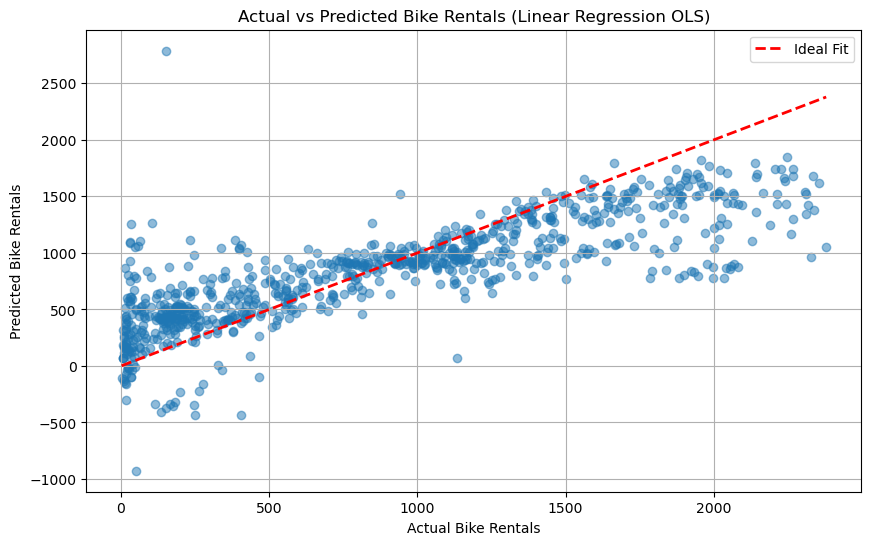

Best MSE of Model:  157163.99124661877
Best R^2 of Model:  0.6467936106547856


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

def linear_regression(X, y, random_state=None):
    seed = 185
    degree = 2 # 1, 2, 3
    batch_size = 8 # 8, 16, 32
    regularization_term = 0.0001 # 0.001, 0.01
    # Define type of penalty
    penalty_type = "l2"
    folds = 10
    # Define number of folds for cross-validation
    kf = KFold(folds)
    # Set Randomness for Reproducibility
    np.random.seed(seed)
    # Perform Polynomial Transformation
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)
    
    model_results = []
    r_squares = []
    mses = []
    # Split into k_folds
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = LinearRegression()
        model.fit(X_train, y_train)

         # Obtain the predictions on the test data
        y_pred = model.predict(X_test)
        
        # store mse score of the model applied on the test data
        mse = mean_squared_error(y_test, y_pred)
        r_square = r2_score(y_test, y_pred)
        
        r_squares.append(r_square)
        mses.append(mse)
        model_results.append([model, mse, r_square, y_pred, y_test])
    
    # print the total_error of the best model
    best_model_index = np.argmax(r_squares)
    
    print(np.mean(mses))
    print(np.mean(r_squares))
    
    return model_results[best_model_index]


# Loud the Standardized Dataset
all_data = pd.DataFrame(pd.read_csv('./ProcessedData.csv'))
X = all_data.drop(columns=['Rented Bike Count', 'Seasons_Autumn', 
                           'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Solar Radiation', 'Snowfall'])
# Set the target variable
y = all_data['Rented Bike Count'].ravel()
# Perform Batch Gradient Descent
model, mse, r_square, y_pred, y_test = linear_regression(X, y)
# Plot y_pred vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals (Linear Regression OLS)')
plt.legend()
plt.grid(True)
plt.show()
print("Best MSE of Model: ", mse)
print("Best R^2 of Model: ", r_square)

Shape of data:
X shape: (8159, 14)
y shape: (8159,)

Average MSE across folds: 49729.4929

Average R^2 across folds: 0.8567

Final MSE on full dataset: 19913.5588
R^2: 0.9427


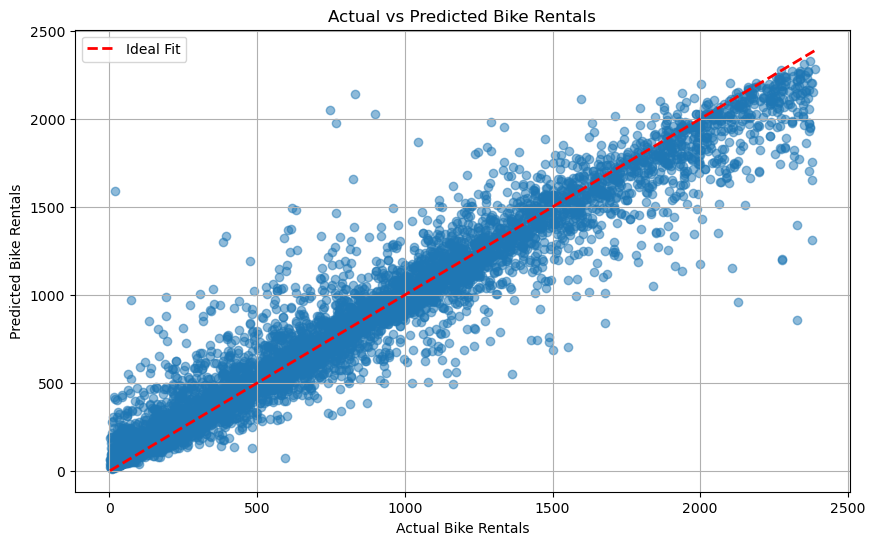

['final_model.pkl']

In [5]:
# Random Tree Forest Approach
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Load data
standardizedData = pd.read_csv('ProcessedData.csv')

X = standardizedData.drop('Rented Bike Count', axis=1) #X = feature matrix
y = standardizedData['Rented Bike Count'] #y = target variable

print("Shape of data:")
print("X shape:", X.shape)
print("y shape:", y.shape)

poly = PolynomialFeatures(degree=1) 
X_poly = poly.fit_transform(X) 

def optimized_gradient_boosting(X, y, folds, learning_rate=0.1, n_estimators=30):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42) #split into folds for cross validation
    fold_mses = [] #just for documentation for the index of the best one
    fold_rs = []
    models = []

    for train_index, val_index in kf.split(X): #loop through the folds
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train Random Forest regressor
        from sklearn.ensemble import RandomForestRegressor

        gbr = RandomForestRegressor()
        gbr.fit(X_train, y_train)

        # Predict and evaluate on the validation set
        y_pred = gbr.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        fold_mses.append(mse)
        fold_rs.append(r2_score(y_val, y_pred))
        models.append(gbr)

    avg_mse = np.mean(fold_mses)
    print(f"\nAverage MSE across folds: {avg_mse:.4f}")
    avg_r = np.mean(fold_rs)
    print(f"\nAverage R^2 across folds: {avg_r:.4f}")
    return models[np.argmin(fold_mses)]  # Return the best model

# Train and get the best model
best_model = optimized_gradient_boosting(X_poly, y, folds=3)

# Final predictions
predictions = best_model.predict(X_poly)

# Clip predictions to prevent negatives
#Did this bc I was getting a lot of negative predictions and it would be practically impossible to sell negative
#bikes (unless someone gave one to you I guess)
predictions = np.clip(predictions, 0, None) 

# Calculate MSE and R^2
final_mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"\nFinal MSE on full dataset: {final_mse:.4f}")
print(f"R^2: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals (Random Tree Forest)')
plt.legend()
plt.grid(True)
plt.show()

# save the final model for use in
joblib.dump(best_model, "final_model.pkl") 